In [1]:
import ast
import pandas as pd

# Load dataset
data = pd.read_csv(r'C:\Users\towik\Downloads\fix_praproses_klasifikasi2.csv')
data.rename(columns={'dominant_label': 'label'}, inplace=True)

# Konversi label dari string ke list (jika perlu)
data['label'] = data['label'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Urutkan label di tempatnya agar formatnya seragam
data['label'] = data['label'].apply(lambda x: sorted(x))

# Hitung distribusi dengan memastikan list diubah menjadi format yang bisa dihitung
label_distribution = data['label'].apply(str).value_counts()

# Tampilkan hasil distribusi
print(label_distribution)

label
['Denigration']                    930
['Harassment']                     669
['Body Shaming']                   475
['Flaming']                        409
['Denigration', 'Flaming']         395
['Body Shaming', 'Denigration']    387
['Flaming', 'Harassment']          375
['Body Shaming', 'Harassment']     319
['Denigration', 'Harassment']      312
['Body Shaming', 'Flaming']        301
Name: count, dtype: int64


In [2]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load dataset
# data = pd.read_csv('/content/drive/MyDrive/Dataset/Skripsi/preprocessed_data.csv')
# data.rename(columns={'dominant_label': 'label'}, inplace=True)

# Konversi label dari string ke list (jika masih dalam format string)
# import ast
# data['label'] = data['label'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Inisialisasi MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Konversi label ke format biner
y = mlb.fit_transform(data['label'])

# Buat DataFrame untuk label yang sudah dikonversi
label_df = pd.DataFrame(y, columns=mlb.classes_)

# Gabungkan dengan dataset awal (Opsional)
data = pd.concat([data, label_df], axis=1)

# Tampilkan hasil
print("Label yang telah dikonversi ke numerik:")
label_df.head()

# Simpan hasil ke file CSV (Opsional)
# data.to_csv('/content/drive/MyDrive/Dataset/Skripsi/data_numerik_label.csv', index=False)

Label yang telah dikonversi ke numerik:


,Body Shaming,Denigration,Flaming,Harassment
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [3]:
data

,username,text,label,binary_label,tokenized_comment,Body Shaming,Denigration,Flaming,Harassment
0,its.mamia,"Udah rusak penampilan, agama. Minimal akhlak lah",[Flaming],Yes,"['sudah', 'rusak', 'tampil', 'agama', 'minimal...",0,0,1,0
1,herru_dic,SOK IYEE bngt baru satu lagu yg booming hadehhh,[Flaming],Yes,"['sok', 'iya', 'sangat', 'baru', 'satu', 'lagu...",0,0,1,0
2,_grestisaa,Pril gak suka malah badannya kecil kepalanya g...,[Body Shaming],Yes,"['prilly', 'tidak', 'suka', 'lebih', 'tepat', ...",1,0,0,0
3,fr.dont_,Jiah... stop denger dan pakai lagunya..... wkw...,[Harassment],Yes,"['jiah', 'henti', 'dengar', 'dan', 'pakai', 'l...",0,0,0,1
4,kaaaoka_,Gausa di zoom deh,[Harassment],Yes,"['tidak', 'usah', 'di', 'zoom', 'deh']",0,0,0,1
...,...,...,...,...,...,...,...,...,...
4567,NaN,Saya tidak ingin ingin ... Anda sangat bangga 😌,"[Flaming, Harassment]",NaN,"['saya', 'tidak', 'ingin', 'ingin', 'anda', 's...",0,0,1,1
4568,NaN,"Tidak perlu membuat lagu, Love Langwrede Grand...","[Flaming, Harassment]",NaN,"['tidak', 'perlu', 'buat', 'lagu', 'cinta', 'l...",0,0,1,1
4569,NaN,Tidak ada yang mengalahkan orang ... sudah san...,"[Flaming, Harassment]",NaN,"['tidak', 'ada', 'yang', 'kalah', 'orang', 'su...",0,0,1,1
4570,NaN,"Saya siap mendengar lagu baru Anda Arogan, mes...","[Flaming, Harassment]",NaN,"['saya', 'siap', 'dengar', 'lagu', 'baru', 'an...",0,0,1,1


In [4]:
from sklearn.model_selection import train_test_split

X = data['tokenized_comment']
y = data[['Body Shaming', 'Denigration', 'Flaming', 'Harassment']]
# Holdout 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Holdout 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Cek ukuran dataset setelah split
print(f"Holdout 80:20 -> Training: {X_train_80.shape[0]}, Testing: {X_test_20.shape[0]}")
print(f"Holdout 70:30 -> Training: {X_train_70.shape[0]}, Testing: {X_test_30.shape[0]}")

Holdout 80:20 -> Training: 3657, Testing: 915
Holdout 70:30 -> Training: 3200, Testing: 1372


In [5]:
data['label'].value_counts()

label
[Denigration]                  930
[Harassment]                   669
[Body Shaming]                 475
[Flaming]                      409
[Denigration, Flaming]         395
[Body Shaming, Denigration]    387
[Flaming, Harassment]          375
[Body Shaming, Harassment]     319
[Denigration, Harassment]      312
[Body Shaming, Flaming]        301
Name: count, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF dengan N-grams (Unigram, Bigram, Trigram)
vectorizer_uni = TfidfVectorizer(ngram_range=(1,1))  # Unigram
vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))  # Bigram
vectorizer_tri = TfidfVectorizer(ngram_range=(3,3))  # Trigram

# TF-IDF pada Training Set 80:20
X_train_80_tfidf_uni = vectorizer_uni.fit_transform(X_train_80)
X_test_20_tfidf_uni = vectorizer_uni.transform(X_test_20)
# X_train_80_tfidf_bi = vectorizer_bi.fit_transform(X_train_80)
# X_test_20_tfidf_bi = vectorizer_bi.transform(X_test_20)
# X_train_80_tfidf_tri = vectorizer_tri.fit_transform(X_train_80)
# X_test_20_tfidf_tri = vectorizer_tri.transform(X_test_20)

# TF-IDF pada Training Set 70:30
X_train_70_tfidf_uni = vectorizer_uni.fit_transform(X_train_70)
X_test_30_tfidf_uni = vectorizer_uni.transform(X_test_30)
# X_train_70_tfidf_bi = vectorizer_bi.fit_transform(X_train_70)
# X_test_30_tfidf_bi = vectorizer_bi.transform(X_test_30)
# X_train_70_tfidf_tri = vectorizer_tri.fit_transform(X_train_70)
# X_test_30_tfidf_tri = vectorizer_tri.transform(X_test_30)

# Cek ukuran fitur setelah TF-IDF
print(f"TF-IDF Unigram 80:20 -> Train Shape: {X_train_80_tfidf_uni.shape}")
print(f"TF-IDF Unigram 80:20 -> Test Shape: {X_test_20_tfidf_uni.shape}")
# print(f"TF-IDF Bigram 80:20 -> Train Shape: {X_train_80_tfidf_bi.shape}")
# print(f"TF-IDF Bigram 80:20 -> Test Shape: {X_test_20_tfidf_bi.shape}")
# print(f"TF-IDF Trigram 80:20 -> Train Shape: {X_train_80_tfidf_tri.shape}")
# print(f"TF-IDF Trigram 80:20 -> Test Shape: {X_test_20_tfidf_tri.shape}")

print(f"\nTF-IDF Unigram 70:30 -> Train Shape: {X_train_70_tfidf_uni.shape}")
print(f"TF-IDF Unigram 70:30 -> Test Shape: {X_test_30_tfidf_uni.shape}")
# print(f"TF-IDF Bigram 70:30 -> Train Shape: {X_train_70_tfidf_bi.shape}")
# print(f"TF-IDF Bigram 70:30 -> Test Shape: {X_test_30_tfidf_bi.shape}")
# print(f"TF-IDF Trigram 70:30 -> Train Shape: {X_train_70_tfidf_tri.shape}")
# print(f"TF-IDF Trigram 70:30 -> Test Shape: {X_test_30_tfidf_tri.shape}")

TF-IDF Unigram 80:20 -> Train Shape: (3657, 3021)
TF-IDF Unigram 80:20 -> Test Shape: (915, 3021)

TF-IDF Unigram 70:30 -> Train Shape: (3200, 2835)
TF-IDF Unigram 70:30 -> Test Shape: (1372, 2835)


In [7]:
# !pip uninstall scikit-multilearn -y
# !pip install scikit-multilearn==0.2.0

In [33]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.0.1

In [8]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, precision_recall_fscore_support, classification_report

classifiers = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

print("=== Label Powerset ===")
for name, model in classifiers.items():
    clf = LabelPowerset(classifier=model)
    clf.fit(X_train_70_tfidf_uni, y_train_70)
    y_pred = clf.predict(X_test_30_tfidf_uni)

    print(f"\n=== LP-{name} 70:30 Unigram ===")

    subset_acc = accuracy_score(y_test_30, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred, average='macro')
    h_loss = hamming_loss(y_test_30, y_pred)

    print(f"Subset Accuracy: {subset_acc:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(classification_report(y_test_30, y_pred, target_names=y.columns))

=== Label Powerset ===

=== LP-SVM 70:30 Unigram ===
Subset Accuracy: 0.7799
Precision: 0.8855, Recall: 0.8565, F1-score: 0.8700
Hamming Loss: 0.0933
              precision    recall  f1-score   support

Body Shaming       0.93      0.88      0.91       445
 Denigration       0.86      0.91      0.88       607
     Flaming       0.90      0.81      0.85       443
  Harassment       0.86      0.83      0.84       503

   micro avg       0.88      0.86      0.87      1998
   macro avg       0.89      0.86      0.87      1998
weighted avg       0.88      0.86      0.87      1998
 samples avg       0.86      0.84      0.84      1998


=== LP-KNN 70:30 Unigram ===
Subset Accuracy: 0.7259
Precision: 0.8343, Recall: 0.8278, F1-score: 0.8282
Hamming Loss: 0.1241
              precision    recall  f1-score   support

Body Shaming       0.85      0.87      0.86       445
 Denigration       0.79      0.90      0.84       607
     Flaming       0.81      0.81      0.81       443
  Harassment     

In [9]:
from skmultilearn.problem_transform import ClassifierChain

classifiers = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

print("=== Classifier Chains ===")
for name, model in classifiers.items():
    clf = ClassifierChain(classifier=model)
    clf.fit(X_train_70_tfidf_uni, y_train_70)
    y_pred = clf.predict(X_test_30_tfidf_uni)

    print(f"\n=== CC-{name} 70:30 Unigram ===")

    subset_acc = accuracy_score(y_test_30, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred, average='macro')
    h_loss = hamming_loss(y_test_30, y_pred)

    print(f"Subset Accuracy: {subset_acc:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(classification_report(y_test_30, y_pred, target_names=y.columns))

=== Classifier Chains ===

=== CC-SVM 70:30 Unigram ===
Subset Accuracy: 0.7347
Precision: 0.8558, Recall: 0.8495, F1-score: 0.8526
Hamming Loss: 0.1066
              precision    recall  f1-score   support

Body Shaming       0.91      0.90      0.90       445
 Denigration       0.88      0.88      0.88       607
     Flaming       0.84      0.81      0.82       443
  Harassment       0.80      0.82      0.81       503

   micro avg       0.86      0.85      0.85      1998
   macro avg       0.86      0.85      0.85      1998
weighted avg       0.86      0.85      0.85      1998
 samples avg       0.84      0.84      0.83      1998


=== CC-KNN 70:30 Unigram ===
Subset Accuracy: 0.7085
Precision: 0.8186, Recall: 0.8301, F1-score: 0.8241
Hamming Loss: 0.1283
              precision    recall  f1-score   support

Body Shaming       0.85      0.88      0.86       445
 Denigration       0.82      0.87      0.84       607
     Flaming       0.80      0.78      0.79       443
  Harassment  

C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== CC-Logistic Regression 70:30 Unigram ===
Subset Accuracy: 0.6625
Precision: 0.8389, Recall: 0.7770, F1-score: 0.8057
Hamming Loss: 0.1345
              precision    recall  f1-score   support

Body Shaming       0.92      0.80      0.86       445
 Denigration       0.83      0.87      0.85       607
     Flaming       0.81      0.70      0.75       443
  Harassment       0.80      0.73      0.76       503

   micro avg       0.84      0.78      0.81      1998
   macro avg       0.84      0.78      0.81      1998
weighted avg       0.84      0.78      0.81      1998
 samples avg       0.82      0.78      0.79      1998


=== CC-Random Forest 70:30 Unigram ===
Subset Accuracy: 0.7449
Precision: 0.8712, Recall: 0.8337, F1-score: 0.8511
Hamming Loss: 0.1060
              precision    recall  f1-score   support

Body Shaming       0.92      0.89      0.91       445
 Denigration       0.88      0.84      0.86       607
     Flaming       0.88      0.75      0.81       443
  Harassment  

C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, precision_recall_fscore_support, classification_report

# Daftar algoritma
classifiers = {
    'SVM': SVC(kernel='linear', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

print("=== Binary Relevance ===")
for name, model in classifiers.items():
    clf = BinaryRelevance(classifier=model)
    clf.fit(X_train_70_tfidf_uni, y_train_70)
    y_pred = clf.predict(X_test_30_tfidf_uni)

    print(f"\n=== BR-{name} 70:30 Unigram ===")

    # Metrics
    subset_acc = accuracy_score(y_test_30, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred, average='macro')
    h_loss = hamming_loss(y_test_30, y_pred)

    print(f"Subset Accuracy: {subset_acc:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Hamming Loss: {h_loss:.4f}")
    print(classification_report(y_test_30, y_pred, target_names=y.columns))

=== Binary Relevance ===

=== BR-SVM 70:30 Unigram ===
Subset Accuracy: 0.7055
Precision: 0.8887, Recall: 0.8370, F1-score: 0.8617
Hamming Loss: 0.0964


C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

Body Shaming       0.91      0.90      0.90       445
 Denigration       0.90      0.88      0.89       607
     Flaming       0.87      0.79      0.83       443
  Harassment       0.87      0.79      0.83       503

   micro avg       0.89      0.84      0.86      1998
   macro avg       0.89      0.84      0.86      1998
weighted avg       0.89      0.84      0.86      1998
 samples avg       0.83      0.82      0.81      1998


=== BR-KNN 70:30 Unigram ===
Subset Accuracy: 0.6290
Precision: 0.9004, Recall: 0.7419, F1-score: 0.8051
Hamming Loss: 0.1239
              precision    recall  f1-score   support

Body Shaming       0.85      0.88      0.86       445
 Denigration       0.89      0.86      0.87       607
     Flaming       0.93      0.60      0.73       443
  Harassment       0.94      0.63      0.76       503

   micro avg       0.89      0.75      0.81      1998
   macro avg       0.90      0.74      0.81      1998
weig

C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== BR-Naive Bayes 70:30 Unigram ===
Subset Accuracy: 0.5875
Precision: 0.9282, Recall: 0.7013, F1-score: 0.7963
Hamming Loss: 0.1255
              precision    recall  f1-score   support

Body Shaming       0.95      0.74      0.83       445
 Denigration       0.94      0.82      0.87       607
     Flaming       0.93      0.59      0.72       443
  Harassment       0.89      0.65      0.76       503

   micro avg       0.93      0.71      0.80      1998
   macro avg       0.93      0.70      0.80      1998
weighted avg       0.93      0.71      0.80      1998
 samples avg       0.77      0.70      0.72      1998



C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== BR-Logistic Regression 70:30 Unigram ===
Subset Accuracy: 0.6217
Precision: 0.8963, Recall: 0.7540, F1-score: 0.8177
Hamming Loss: 0.1194
              precision    recall  f1-score   support

Body Shaming       0.92      0.80      0.86       445
 Denigration       0.90      0.84      0.87       607
     Flaming       0.89      0.68      0.77       443
  Harassment       0.88      0.69      0.77       503

   micro avg       0.90      0.76      0.82      1998
   macro avg       0.90      0.75      0.82      1998
weighted avg       0.90      0.76      0.82      1998
 samples avg       0.80      0.75      0.76      1998



C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== BR-Random Forest 70:30 Unigram ===
Subset Accuracy: 0.7092
Precision: 0.9037, Recall: 0.8210, F1-score: 0.8599
Hamming Loss: 0.0971
              precision    recall  f1-score   support

Body Shaming       0.92      0.89      0.90       445
 Denigration       0.90      0.83      0.86       607
     Flaming       0.90      0.76      0.83       443
  Harassment       0.89      0.81      0.85       503

   micro avg       0.90      0.82      0.86      1998
   macro avg       0.90      0.82      0.86      1998
weighted avg       0.90      0.82      0.86      1998
 samples avg       0.80      0.79      0.79      1998



C:\Users\towik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\towik\AppData\Local\Temp\ipykernel_21692\203589632.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='Hamming Loss', data=df, palette='Reds')


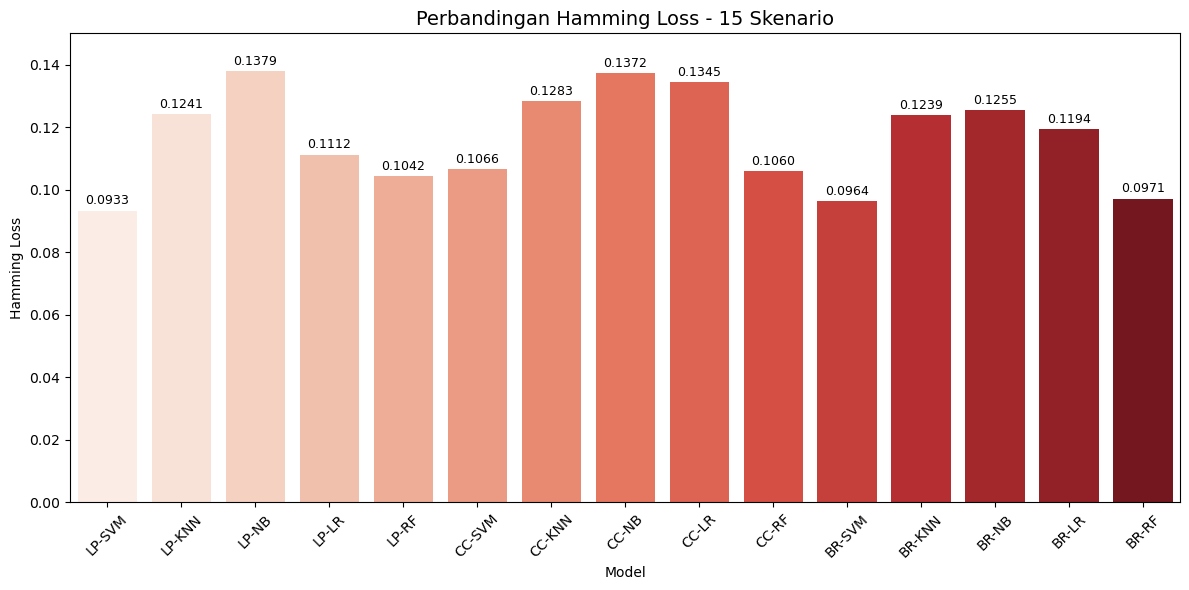

C:\Users\towik\AppData\Local\Temp\ipykernel_21692\203589632.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='F1-score', data=df, palette='Blues')


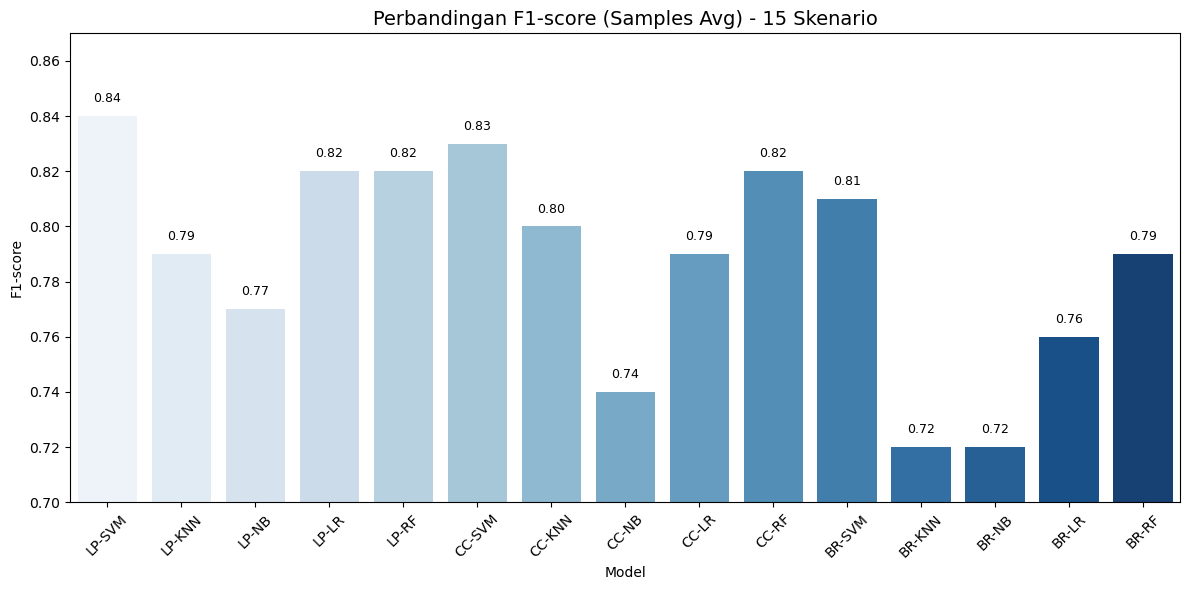

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data skenario, hamming loss dan f1-score (samples avg)
data = {
    'Model': [
        'LP-SVM', 'LP-KNN', 'LP-NB', 'LP-LR', 'LP-RF',
        'CC-SVM', 'CC-KNN', 'CC-NB', 'CC-LR', 'CC-RF',
        'BR-SVM', 'BR-KNN', 'BR-NB', 'BR-LR', 'BR-RF'
    ],
    'Hamming Loss': [
        0.0933, 0.1241, 0.1379, 0.1112, 0.1042,
        0.1066, 0.1283, 0.1372, 0.1345, 0.1060,
        0.0964, 0.1239, 0.1255, 0.1194, 0.0971
    ],
    'F1-score': [
        0.84, 0.79, 0.77, 0.82, 0.82,
        0.83, 0.80, 0.74, 0.79, 0.82,
        0.81, 0.72, 0.72, 0.76, 0.79
    ]
}

# Convert ke DataFrame
df = pd.DataFrame(data)

# Plot Hamming Loss
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='Model', y='Hamming Loss', data=df, palette='Reds')

# Tambahkan nilai di atas batang
for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width() / 2.,  # posisi x
        p.get_height() + 0.002,          # posisi y
        '{:.4f}'.format(p.get_height()), # format angka
        ha='center', fontsize=9
    )

plt.title('Perbandingan Hamming Loss - 15 Skenario', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 0.15)
plt.tight_layout()
plt.show()

# Plot F1-score
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='Model', y='F1-score', data=df, palette='Blues')

# Tambahkan nilai di atas batang
for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width() / 2., 
        p.get_height() + 0.005, 
        '{:.2f}'.format(p.get_height()), 
        ha='center', fontsize=9
    )

plt.title('Perbandingan F1-score (Samples Avg) - 15 Skenario', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.7, 0.87)
plt.tight_layout()
plt.show()

In [ ]:
#--------------------------------------------- SKRIPSI -----------------------------------------------------

In [10]:
# Data TF-IDF dan label
X_train_80_tfidf_uni, X_test_20_tfidf_uni
y_train_80, y_test_20
mlb = MultiLabelBinarizer().fit(your_labels)

NameError: name 'your_labels' is not defined

In [7]:
# Inisialisasi LP-KNN
from skmultilearn.problem_transform import LabelPowerset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, classification_report
lp_knn = LabelPowerset(KNeighborsClassifier(n_neighbors=5))
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report

# Training LP-KNN pada TF-IDF Unigram 80:20
lp_knn_uni = lp_knn  # Membuat instance spesifik untuk Unigram
lp_knn_uni.fit(X_train_80_tfidf_uni, y_train_80)
y_pred_lp_knn_uni_20 = lp_knn_uni.predict(X_test_20_tfidf_uni)

# Evaluasi LP-KNN (80:20) Unigram
print("\n=== LP-KNN 80:20 Unigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_lp_knn_uni_20, average='weighted', zero_division=0)
hamming_loss_uni = hamming_loss(y_test_20, y_pred_lp_knn_uni_20)
subset_accuracy_uni = accuracy_score(y_test_20, y_pred_lp_knn_uni_20)
print(f"Subset Accuracy: {subset_accuracy_uni:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_uni:.4f}")
print(classification_report(y_test_20, y_pred_lp_knn_uni_20, target_names=mlb.classes_, zero_division=0))

# Training LP-KNN pada TF-IDF Bigram 80:20
lp_knn_bi = lp_knn  # Membuat instance spesifik untuk Bigram
lp_knn_bi.fit(X_train_80_tfidf_bi, y_train_80)
y_pred_lp_knn_bi_20 = lp_knn_bi.predict(X_test_20_tfidf_bi)

# Evaluasi LP-KNN (80:20) Bigram
print("\n=== LP-KNN 80:20 Bigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_lp_knn_bi_20, average='weighted', zero_division=0)
hamming_loss_bi = hamming_loss(y_test_20, y_pred_lp_knn_bi_20)
subset_accuracy_bi = accuracy_score(y_test_20, y_pred_lp_knn_bi_20)
print(f"Subset Accuracy: {subset_accuracy_bi:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_bi:.4f}")
print(classification_report(y_test_20, y_pred_lp_knn_bi_20, target_names=mlb.classes_, zero_division=0))

# Training LP-KNN pada TF-IDF Trigram 80:20
lp_knn_tri = lp_knn  # Membuat instance spesifik untuk Trigram
lp_knn_tri.fit(X_train_80_tfidf_tri, y_train_80)
y_pred_lp_knn_tri_20 = lp_knn_tri.predict(X_test_20_tfidf_tri)

# Evaluasi LP-KNN (80:20) Trigram
print("\n=== LP-KNN 80:20 Trigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_lp_knn_tri_20, average='weighted', zero_division=0)
hamming_loss_tri = hamming_loss(y_test_20, y_pred_lp_knn_tri_20)
subset_accuracy_tri = accuracy_score(y_test_20, y_pred_lp_knn_tri_20)
print(f"Subset Accuracy: {subset_accuracy_tri:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_tri:.4f}")
print(classification_report(y_test_20, y_pred_lp_knn_tri_20, target_names=mlb.classes_, zero_division=0))


=== LP-KNN 80:20 Unigram ===
Subset Accuracy: 0.5803
Precision: 0.8396, Recall: 0.6549, F1-score: 0.6809
Hamming Loss: 0.2096
              precision    recall  f1-score   support

Body Shaming       0.94      0.69      0.79       297
 Denigration       0.58      0.97      0.73       405
     Flaming       0.92      0.49      0.64       296
  Harassment       0.98      0.39      0.56       335

   micro avg       0.74      0.65      0.69      1333
   macro avg       0.86      0.63      0.68      1333
weighted avg       0.84      0.65      0.68      1333
 samples avg       0.67      0.63      0.64      1333


=== LP-KNN 80:20 Bigram ===
Subset Accuracy: 0.2721
Precision: 0.6992, Recall: 0.6512, F1-score: 0.5152
Hamming Loss: 0.3809
              precision    recall  f1-score   support

Body Shaming       0.37      0.99      0.54       297
 Denigration       0.48      1.00      0.65       405
     Flaming       0.98      0.34      0.51       296
  Harassment       1.00      0.20      0.

In [9]:
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report

# Training LP-KNN pada TF-IDF Unigram 70:30
lp_knn_uni_70 = lp_knn  # Membuat instance spesifik untuk Unigram
lp_knn_uni_70.fit(X_train_70_tfidf_uni, y_train_70)
y_pred_lp_knn_uni_30 = lp_knn_uni_70.predict(X_test_30_tfidf_uni)

# Evaluasi LP-KNN (70:30) Unigram
print("\n=== LP-KNN 70:30 Unigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_lp_knn_uni_30, average='weighted', zero_division=0)
hamming_loss_uni_30 = hamming_loss(y_test_30, y_pred_lp_knn_uni_30)
subset_accuracy_uni_30 = accuracy_score(y_test_30, y_pred_lp_knn_uni_30)
print(f"Subset Accuracy: {subset_accuracy_uni_30:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_uni_30:.4f}")
print(classification_report(y_test_30, y_pred_lp_knn_uni_30, target_names=mlb.classes_, zero_division=0))

# Training LP-KNN pada TF-IDF Bigram 70:30
lp_knn_bi_70 = lp_knn  # Membuat instance spesifik untuk Bigram
lp_knn_bi_70.fit(X_train_70_tfidf_bi, y_train_70)
y_pred_lp_knn_bi_30 = lp_knn_bi_70.predict(X_test_30_tfidf_bi)

# Evaluasi LP-KNN (70:30) Bigram
print("\n=== LP-KNN 70:30 Bigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_lp_knn_bi_30, average='weighted', zero_division=0)
hamming_loss_bi_30 = hamming_loss(y_test_30, y_pred_lp_knn_bi_30)
subset_accuracy_bi_30 = accuracy_score(y_test_30, y_pred_lp_knn_bi_30)
print(f"Subset Accuracy: {subset_accuracy_bi_30:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_bi_30:.4f}")
print(classification_report(y_test_30, y_pred_lp_knn_bi_30, target_names=mlb.classes_, zero_division=0))

# Training LP-KNN pada TF-IDF Trigram 70:30
lp_knn_tri_70 = lp_knn  # Membuat instance spesifik untuk Trigram
lp_knn_tri_70.fit(X_train_70_tfidf_tri, y_train_70)
y_pred_lp_knn_tri_30 = lp_knn_tri_70.predict(X_test_30_tfidf_tri)

# Evaluasi LP-KNN (70:30) Trigram
print("\n=== LP-KNN 70:30 Trigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_lp_knn_tri_30, average='weighted', zero_division=0)
hamming_loss_tri_30 = hamming_loss(y_test_30, y_pred_lp_knn_tri_30)
subset_accuracy_tri_30 = accuracy_score(y_test_30, y_pred_lp_knn_tri_30)
print(f"Subset Accuracy: {subset_accuracy_tri_30:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_tri_30:.4f}")
print(classification_report(y_test_30, y_pred_lp_knn_tri_30, target_names=mlb.classes_, zero_division=0))


=== LP-KNN 70:30 Unigram ===
Subset Accuracy: 0.7259
Precision: 0.8328, Recall: 0.8308, F1-score: 0.8288
Hamming Loss: 0.1241
              precision    recall  f1-score   support

Body Shaming       0.85      0.87      0.86       445
 Denigration       0.79      0.90      0.84       607
     Flaming       0.81      0.81      0.81       443
  Harassment       0.89      0.73      0.80       503

   micro avg       0.83      0.83      0.83      1998
   macro avg       0.83      0.83      0.83      1998
weighted avg       0.83      0.83      0.83      1998
 samples avg       0.80      0.80      0.79      1998


=== LP-KNN 70:30 Bigram ===
Subset Accuracy: 0.1990
Precision: 0.6892, Recall: 0.6061, F1-score: 0.4445
Hamming Loss: 0.4196
              precision    recall  f1-score   support

Body Shaming       0.35      1.00      0.52       445
 Denigration       0.47      1.00      0.64       607
     Flaming       0.98      0.22      0.36       443
  Harassment       1.00      0.12      0.

In [28]:
from skmultilearn.adapt import MLkNN
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report
import numpy as np

# Inisialisasi ML-KNN dengan K=3
ml_knn = MLkNN(k=5)

In [29]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report

# Pastikan konversi sparse matrix menjadi array biasa jika diperlukan
X_train_array = X_train_80_tfidf_uni.toarray()  # Mengonversi sparse matrix menjadi array biasa
X_test_array = X_test_20_tfidf_uni.toarray()    # Mengonversi sparse matrix menjadi array biasa

# Jika y_train_80 adalah list 1D, ubah menjadi array 2D
y_train_array = np.array(y_train_80)

# Training ML-KNN pada TF-IDF Unigram 80:20
ml_knn_uni_80 = ml_knn
ml_knn_uni_80.fit(X_train_array, y_train_array)
y_pred_ml_knn_20 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (80:20)
print("\n=== ML-KNN 80:20 Unigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_ml_knn_20, average='weighted', zero_division=0)
hamming_loss_ml_knn_20 = hamming_loss(y_test_20, y_pred_ml_knn_20)
subset_accuracy = accuracy_score(y_test_20, y_pred_ml_knn_20)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_20:.4f}")
print(classification_report(y_test_20, y_pred_ml_knn_20, target_names=mlb.classes_, zero_division=0))

X_train_array = X_train_80_tfidf_bi.toarray()  # Mengonversi sparse matrix menjadi array biasa
X_test_array = X_test_20_tfidf_bi.toarray()    # Mengonversi sparse matrix menjadi array biasa
# Training ML-KNN pada TF-IDF Bigram 80:20
ml_knn_bi_80 = ml_knn
ml_knn_bi_80.fit(X_train_array, y_train_array)
y_pred_ml_knn_20 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (80:20)
print("\n=== ML-KNN 80:20 Bigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_ml_knn_20, average='weighted', zero_division=0)
hamming_loss_ml_knn_20 = hamming_loss(y_test_20, y_pred_ml_knn_20)
subset_accuracy = accuracy_score(y_test_20, y_pred_ml_knn_20)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_20:.4f}")
print(classification_report(y_test_20, y_pred_ml_knn_20, target_names=mlb.classes_, zero_division=0))

X_train_array = X_train_80_tfidf_tri.toarray()  # Mengonversi sparse matrix menjadi array triasa
X_test_array = X_test_20_tfidf_tri.toarray()    # Mengonversi sparse matrix menjadi arraytrbiasa
# Training ML-KNN pada TF-IDF Trigram 80:20
ml_knn_tri_80 = ml_knn
ml_knn_tri_80.fit(X_train_array, y_train_array)
y_pred_ml_knn_20 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (80:20)
print("\n=== ML-KNN 80:20 Trigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_20, y_pred_ml_knn_20, average='weighted', zero_division=0)
hamming_loss_ml_knn_20 = hamming_loss(y_test_20, y_pred_ml_knn_20)
subset_accuracy = accuracy_score(y_test_20, y_pred_ml_knn_20)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_20:.4f}")
print(classification_report(y_test_20, y_pred_ml_knn_20, target_names=mlb.classes_, zero_division=0))


=== ML-KNN 80:20 Unigram ===
Subset Accuracy: 0.6885
Precision: 0.8603, Recall: 0.8192, F1-score: 0.8353
Hamming Loss: 0.1169
              precision    recall  f1-score   support

Body Shaming       0.91      0.83      0.87       297
 Denigration       0.79      0.92      0.85       405
     Flaming       0.86      0.73      0.79       296
  Harassment       0.90      0.77      0.83       335

   micro avg       0.85      0.82      0.84      1333
   macro avg       0.87      0.81      0.83      1333
weighted avg       0.86      0.82      0.84      1333
 samples avg       0.78      0.78      0.77      1333


=== ML-KNN 80:20 Bigram ===
Subset Accuracy: 0.4328
Precision: 0.7448, Recall: 0.6497, F1-score: 0.6127
Hamming Loss: 0.3055
              precision    recall  f1-score   support

Body Shaming       0.41      0.99      0.59       297
 Denigration       0.98      0.44      0.61       405
     Flaming       0.51      0.78      0.62       296
  Harassment       0.96      0.48      0.

In [32]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report

# Pastikan konversi sparse matrix menjadi array biasa jika diperlukan
X_train_array = X_train_70_tfidf_uni.toarray()  # Mengonversi sparse matrix menjadi array biasa
X_test_array = X_test_30_tfidf_uni.toarray()    # Mengonversi sparse matrix menjadi array biasa

# Jika y_train_70 adalah list 1D, ubah menjadi array 2D
y_train_array = np.array(y_train_70)

# Training ML-KNN pada TF-IDF Unigram 70:30
ml_knn_uni_70 = ml_knn
ml_knn_uni_70.fit(X_train_array, y_train_array)
y_pred_ml_knn_30 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (70:30)
print("\n=== ML-KNN 70:30 Unigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_ml_knn_30, average='weighted', zero_division=0)
hamming_loss_ml_knn_30 = hamming_loss(y_test_30, y_pred_ml_knn_30)
subset_accuracy = accuracy_score(y_test_30, y_pred_ml_knn_30)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_30:.4f}")
print(classification_report(y_test_30, y_pred_ml_knn_30, target_names=mlb.classes_, zero_division=0))

X_train_array = X_train_70_tfidf_bi.toarray()  # Mengonversi sparse matrix menjadi array biasa
X_test_array = X_test_30_tfidf_bi.toarray()    # Mengonversi sparse matrix menjadi array biasa
# Training ML-KNN pada TF-IDF Bigram 70:30
ml_knn_bi_70 = ml_knn
ml_knn_bi_70.fit(X_train_array, y_train_array)
y_pred_ml_knn_30 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (70:30)
print("\n=== ML-KNN 70:30 Bigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_ml_knn_30, average='weighted', zero_division=0)
hamming_loss_ml_knn_30 = hamming_loss(y_test_30, y_pred_ml_knn_30)
subset_accuracy = accuracy_score(y_test_30, y_pred_ml_knn_30)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_30:.4f}")
print(classification_report(y_test_30, y_pred_ml_knn_30, target_names=mlb.classes_, zero_division=0))

X_train_array = X_train_70_tfidf_tri.toarray()  # Mengonversi sparse matrix menjadi array triasa
X_test_array = X_test_30_tfidf_tri.toarray()    # Mengonversi sparse matrix menjadi arraytrbiasa
# Training ML-KNN pada TF-IDF Trigram 70:30
ml_knn_tri_70 = ml_knn
ml_knn_tri_70.fit(X_train_array, y_train_array)
y_pred_ml_knn_30 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (70:30)
print("\n=== ML-KNN 70:30 Trigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_ml_knn_30, average='weighted', zero_division=0)
hamming_loss_ml_knn_30 = hamming_loss(y_test_30, y_pred_ml_knn_30)
subset_accuracy = accuracy_score(y_test_30, y_pred_ml_knn_30)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_30:.4f}")
print(classification_report(y_test_30, y_pred_ml_knn_30, target_names=mlb.classes_, zero_division=0))


=== ML-KNN 70:30 Unigram ===
Subset Accuracy: 0.7238
Precision: 0.8436, Recall: 0.8569, F1-score: 0.8499
Hamming Loss: 0.1104
              precision    recall  f1-score   support

Body Shaming       0.85      0.88      0.86       445
 Denigration       0.89      0.86      0.87       607
     Flaming       0.79      0.83      0.81       443
  Harassment       0.83      0.86      0.84       503

   micro avg       0.84      0.86      0.85      1998
   macro avg       0.84      0.86      0.85      1998
weighted avg       0.84      0.86      0.85      1998
 samples avg       0.80      0.82      0.81      1998


=== ML-KNN 70:30 Bigram ===
Subset Accuracy: 0.3601
Precision: 0.7124, Recall: 0.7417, F1-score: 0.6346
Hamming Loss: 0.3129
              precision    recall  f1-score   support

Body Shaming       0.40      1.00      0.57       445
 Denigration       0.54      0.99      0.70       607
     Flaming       0.98      0.47      0.63       443
  Harassment       0.97      0.46      0.

In [43]:
import joblib

# Menyimpan model yang telah dilatih ke dalam file
joblib.dump(ml_knn_uni_70, 'model2.pkl')
joblib.dump(vectorizer_uni, 'tfidfmodel2.pkl')

print("Model berhasil disimpan.")

Model berhasil disimpan.


In [49]:
from skmultilearn.adapt import MLkNN
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report
import numpy as np

# Inisialisasi ML-KNN dengan K=3
ml_knn = MLkNN(k=15)

In [51]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, hamming_loss, accuracy_score, classification_report

# Pastikan konversi sparse matrix menjadi array biasa jika diperlukan
X_train_array = X_train_70_tfidf_uni.toarray()  # Mengonversi sparse matrix menjadi array biasa
X_test_array = X_test_30_tfidf_uni.toarray()    # Mengonversi sparse matrix menjadi array biasa

# Jika y_train_70 adalah list 1D, ubah menjadi array 2D
y_train_array = np.array(y_train_70)

# Training ML-KNN pada TF-IDF Unigram 70:30
ml_knn_uni_70 = ml_knn
ml_knn_uni_70.fit(X_train_array, y_train_array)
y_pred_ml_knn_30 = ml_knn.predict(X_test_array)

# Evaluasi ML-KNN (70:30)
print("\n=== ML-KNN 70:30 Unigram ===")
precision, recall, f1, _ = precision_recall_fscore_support(y_test_30, y_pred_ml_knn_30, average='weighted', zero_division=0)
hamming_loss_ml_knn_30 = hamming_loss(y_test_30, y_pred_ml_knn_30)
subset_accuracy = accuracy_score(y_test_30, y_pred_ml_knn_30)
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming_loss_ml_knn_30:.4f}")
print(classification_report(y_test_30, y_pred_ml_knn_30, target_names=mlb.classes_, zero_division=0))


=== ML-KNN 70:30 Unigram ===
Subset Accuracy: 0.6079
Precision: 0.8114, Recall: 0.7938, F1-score: 0.8016
Hamming Loss: 0.1419
              precision    recall  f1-score   support

Body Shaming       0.82      0.85      0.84       445
 Denigration       0.82      0.84      0.83       607
     Flaming       0.80      0.70      0.74       443
  Harassment       0.80      0.77      0.79       503

   micro avg       0.81      0.79      0.80      1998
   macro avg       0.81      0.79      0.80      1998
weighted avg       0.81      0.79      0.80      1998
 samples avg       0.79      0.79      0.77      1998



In [42]:
# Prediksi pada training set
y_train_pred = ml_knn_uni_70.predict(X_train_array)

# Evaluasi pada training set
print("\n=== Evaluasi pada Training Set ===")
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train_array, y_train_pred, average='weighted', zero_division=0)
hamming_loss_train = hamming_loss(y_train_array, y_train_pred)
subset_accuracy_train = accuracy_score(y_train_array, y_train_pred)
print(f"Subset Accuracy (Train): {subset_accuracy_train:.4f}")
print(f"Precision (Train): {precision_train:.4f}, Recall (Train): {recall_train:.4f}, F1-score (Train): {f1_train:.4f}")
print(f"Hamming Loss (Train): {hamming_loss_train:.4f}")


=== Evaluasi pada Training Set ===
Subset Accuracy (Train): 0.8413
Precision (Train): 0.9186, Recall (Train): 0.9237, F1-score (Train): 0.9209
Hamming Loss (Train): 0.0580


Confusion Matrix:
[[390  34   7  14]
 [ 75 371  28  17]
 [ 33  40 123  39]
 [ 24  30  16 131]]


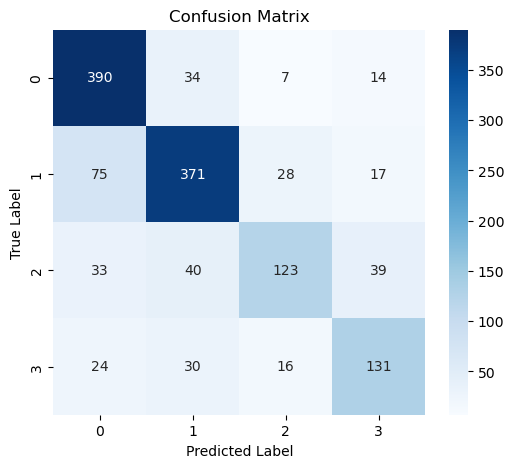

In [53]:
# Konversi ke array numpy jika berbentuk sparse matrix
from sklearn.metrics import confusion_matrix

if hasattr(y_pred_ml_knn_30, "toarray"):
    y_pred_ml_knn_30 = y_pred_ml_knn_30.toarray()

if hasattr(y_test_30, "toarray"):
    y_test_30 = y_test_30.toarray()

# Konversi multilabel menjadi label tunggal (menggunakan argmax atau strategi lain)
y_test_single = np.argmax(y_test_30, axis=1)
y_pred_single = np.argmax(y_pred_ml_knn_30, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_test_single, y_pred_single)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualisasi menggunakan heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix dengan Kombinasi Label:
Predicted                 Body Shaming  Body Shaming+Denigration  \
Actual                                                             
Body Shaming                       108                        13   
Body Shaming+Denigration             9                        83   
Body Shaming+Flaming                14                         2   
Body Shaming+Harassment             12                         1   
Denigration                         13                        23   
Denigration+Flaming                  1                         2   
Denigration+Harassment               1                         5   
Flaming                              5                         2   
Flaming+Harassment                   0                         1   
Harassment                           1                         3   

Predicted                 Body Shaming+Denigration+Flaming  \
Actual                                                       
Body Shaming     

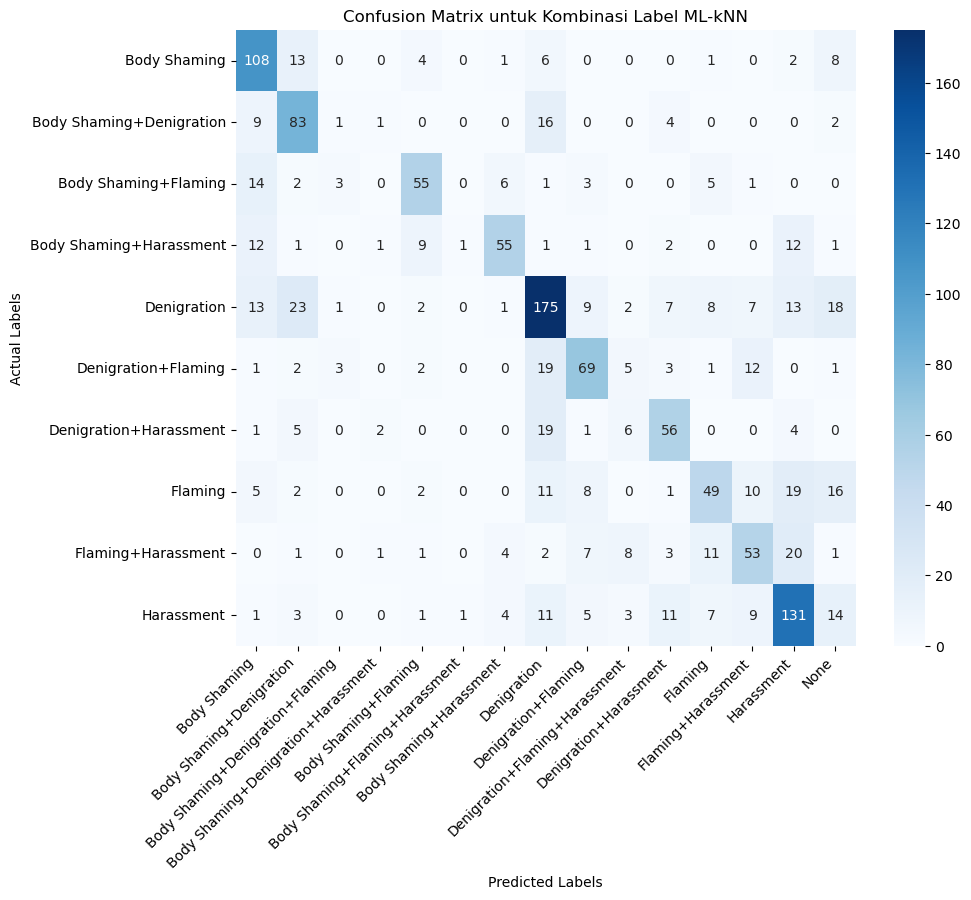

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Konversi y_test_30 dari DataFrame ke NumPy array
y_test_array = y_test_30.to_numpy()

# Nama label
labels = ["Body Shaming", "Denigration", "Flaming", "Harassment"]

# Fungsi untuk mengonversi array multilabel ke string kombinasi label
def labels_to_string(y_array):
    return ["+".join([labels[i] for i, val in enumerate(row) if val == 1]) or "None" for row in y_array]

# Ubah y_test_30 dan y_pred_ml_knn_30 ke bentuk string kombinasi label
y_test_str = labels_to_string(y_test_array)
y_pred_str = labels_to_string(y_pred_ml_knn_30)

# Buat confusion matrix dalam bentuk crosstab
df_cm = pd.crosstab(pd.Series(y_test_str, name="Actual"), pd.Series(y_pred_str, name="Predicted"), rownames=["Actual"], colnames=["Predicted"])

# Cetak hasil confusion matrix dalam bentuk tabel
print("\nConfusion Matrix dengan Kombinasi Label:")
print(df_cm)

# Visualisasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix untuk Kombinasi Label ML-kNN")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.savefig("heatmap_confusion_matrix_kombinasi.png", dpi=300, bbox_inches="tight")
plt.show()

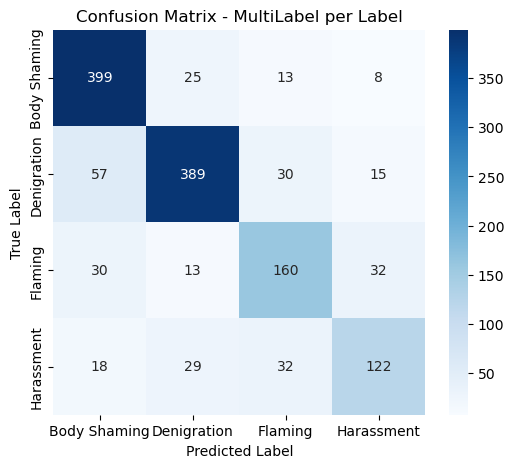

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Konversi DataFrame ke NumPy array jika belum
y_test_array = y_test_30.to_numpy()

# Ubah multilabel menjadi multiclass (hanya satu label per sampel)
y_test_single = np.argmax(y_test_array, axis=1)
y_pred_single = np.argmax(y_pred_ml_knn_30, axis=1)

# Label kelas
labels = ["Body Shaming", "Denigration", "Flaming", "Harassment"]

# Buat confusion matrix gabungan
cm = confusion_matrix(y_test_single, y_pred_single)

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - MultiLabel per Label")
plt.savefig("heatmap_confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix

# Menghitung multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test_30, y_pred_ml_knn_30)

# Ekstrak TP, FP, FN, TN untuk setiap label
labels = mlb.classes_  # Label dari MultiLabelBinarizer
data = []

for i, label in enumerate(labels):
    tn, fp, fn, tp = mcm[i].ravel()
    data.append([label, tp, fp, fn, tn])

# Buat DataFrame
df_conf_matrix = pd.DataFrame(data, columns=["Label", "TP", "FP", "FN", "TN"])

# Tampilkan tabel
print(df_conf_matrix)

          Label   TP  FP  FN   TN
0  Body Shaming  390  67  55  860
1   Denigration  520  67  87  698
2       Flaming  369  97  74  832
3    Harassment  433  89  70  780


In [19]:
y_test_20.sum()

Body Shaming    297
Denigration     405
Flaming         296
Harassment      335
dtype: int64

In [20]:
import numpy as np
import pandas as pd

# Pastikan hasil prediksi berbentuk array 2D
y_pred_array = y_pred_ml_knn_20.toarray()
y_test_array = np.array(y_test_20)

# Buat DataFrame untuk melihat perbandingan label asli dan prediksi
# df_comparison = pd.DataFrame({
#     "y_test": [list(row) for row in y_test_array],   # Label asli
#     "y_pred": [list(row) for row in y_pred_array]    # Prediksi model
# })

# Menampilkan beberapa sampel
# df_comparison.head(10)

import numpy as np

print("Shape y_test_array:", np.shape(y_test_array))
print("Shape y_pred_array:", np.shape(y_pred_array))



AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [21]:
import numpy as np

# TP, TN, FP, FN untuk setiap label
TP = np.sum((y_pred_array == 1) & (y_test_array == 1), axis=0)
TN = np.sum((y_pred_array == 0) & (y_test_array == 0), axis=0)
FP = np.sum((y_pred_array == 1) & (y_test_array == 0), axis=0)
FN = np.sum((y_pred_array == 0) & (y_test_array == 1), axis=0)

# Menampilkan hasil untuk setiap label
labels = ["Body Shaming", "Denigration", "Flaming", "Harassment", "Neutral"]

for i, label in enumerate(labels):
    print(f"Label: {label}")
    print(f"  TP: {TP[i]}")
    print(f"  TN: {TN[i]}")
    print(f"  FP: {FP[i]}")
    print(f"  FN: {FN[i]}\n")


NameError: name 'y_pred_array' is not defined

In [4]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\towik\Downloads\data_klasifikasi_bully.csv')
df

,username,text,dominant_label,binary_label
0,78rezamln,"Lo udah tua, muka kusut, badan kek papan jalan...","['Body Shaming', 'Harassment']",Yes
1,zulaika_gueklai,Maaf y prili jelek banget kmu dgn tubuh yg sjr...,['Body Shaming'],Yes
2,hyanman363,Mendalami peran bs sampek mau jadi selingkuhan🤣🤣,['Denigration'],Yes
3,__0ldsoull,onty dosma siap mengasuh ponakan iky😭,['Denigration'],Yes
4,nurussw,Gini banget ya. Pdhl SH udah mau nemenin RN ba...,['Denigration'],Yes
...,...,...,...,...
2846,wawansutrisno14,TENANG BISNISNYA AMAN A RAFI UDAH DIKONDISIKAN!,['Denigration'],Yes
2847,rsk_nndila,Dua duanya udh muncul sifat aslinya yaa,['Denigration'],Yes
2848,ferry_antonio,Wkkww komen aneh lngsung di hapus admin,['Denigration'],Yes
2849,maftr.n,"Yaallah pril diet ya kelewatan inimah, saya aj...",['Body Shaming'],Yes


In [3]:
df['dominant_label'].value_counts()

dominant_label
['Denigration']                    930
['Harassment']                     669
['Body Shaming']                   475
['Flaming']                        409
['Flaming', 'Harassment']          101
['Denigration', 'Flaming']          60
['Body Shaming', 'Denigration']     58
['Denigration', 'Harassment']       53
['Body Shaming', 'Flaming']         49
['Body Shaming', 'Harassment']      47
Name: count, dtype: int64

In [39]:
from googletrans import Translator
import time

translator = Translator()

def back_translate(text, source_lang="id", target_lang="en"):
    try:
        translated = translator.translate(text, src=source_lang, dest=target_lang).text
        time.sleep(1)  # Hindari rate limit
        back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
        return back_translated
    except Exception as e:
        print(f"⚠️ Error saat menerjemahkan: {text} → {e}")
        return text  # Jika gagal, kembalikan teks aslinya

        
df_filtered = df[df['dominant_label'].apply(str) == "['Flaming', 'Harassment']"]


# Back translation tahap pertama (Indonesia → Inggris → Indonesia)
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(1)  # Hindari rate limit

# Gabungkan data asli dengan hasil translasi pertama
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# Lakukan back translation tahap kedua (Indonesia → Jerman → Indonesia)
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(1)


# Gabungkan data asli + hasil translasi tahap 1 + hasil translasi tahap 2
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Flaming, Harrassment]'})

# Simpan ke CSV (opsional)
df_augmented

,text,dominant_label
0,Baru denger lagunya dan sumpah gak enak bgt di...,"[Flaming, Harrassment]"
1,"Lu tau ga si lu tu kodratnya cowo, ngapain pak...","[Flaming, Harrassment]"
2,Berasa paling terkenal lu bangsat,"[Flaming, Harrassment]"
3,"Kesiniii karena ga sudi🤣🤣 bang, bang..beneran ...","[Flaming, Harrassment]"
4,Ayooo semuaa Unfollow. Gak faedah banget lagun...,"[Flaming, Harrassment]"
...,...,...
399,"Tidak perlu membuat lagu, Love Langwrede Grand...","[Flaming, Harrassment]"
400,Tidak ada yang mengalahkan orang ... sudah san...,"[Flaming, Harrassment]"
401,"Saya siap mendengar lagu baru Anda Arogan, mes...","[Flaming, Harrassment]"
402,Saya baru saja mendengarnya dan tidak menyukai...,"[Flaming, Harrassment]"


In [40]:
df_augmented.to_csv("aug_flamingharassment.csv", index=False)

In [53]:
from googletrans import Translator
import time
import pandas as pd

translator = Translator()

def back_translate(text, source_lang="id", target_lang="en"):
    try:
        translated = translator.translate(text, src=source_lang, dest=target_lang).text
        time.sleep(1)  # Hindari rate limit
        back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
        return back_translated
    except Exception as e:
        print(f"⚠️ Error saat menerjemahkan: {text} → {e}")
        return text  # Jika gagal, kembalikan teks aslinya

# Filter data dengan label tertentu
df_filtered = df[df['dominant_label'].apply(str) == "['Denigration', 'Flaming']"]

# 🔹 **Tahap 1: Translasi awal (Indonesia → Inggris → Indonesia)**
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(1)

# Gabungkan data asli dengan hasil translasi tahap 1
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# 🔹 **Tahap 2: Translasi (Indonesia → Jerman → Indonesia)**
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(1)

# Gabungkan data asli + hasil tahap 1 + hasil tahap 2
combined_texts_2 = df_filtered['text'].tolist() + translated_texts_1 + translated_texts_2

# 🔹 **Tahap 3: Translasi (Indonesia → Prancis → Indonesia)**
translated_texts_3 = [back_translate(text, 'id', 'fr') for text in combined_texts_2]
time.sleep(1)

# 🔹 **Gabungkan semua hasil translasi ke dalam satu dataset**
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2 + translated_texts_3

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Denigration, Flaming]'})

# Tampilkan hasil
df_augmented

,text,dominant_label
0,"Sok oke kek penyanyi tenar aja lu tong, nyari ...","[Denigration, Flaming]"
1,Alhamdulillah cipa buang mantan napi dapet ber...,"[Denigration, Flaming]"
2,"Gayamuuu bro 😂 ndangak mu keduwureennn, ndingk...","[Denigration, Flaming]"
3,G malu jd boti kah bang?😭,"[Denigration, Flaming]"
4,#kamimuak dgn kemunafikan kalian 🤮🤮🤮,"[Denigration, Flaming]"
...,...,...
475,"Dia seorang penyanyi fomo, tidak!","[Denigration, Flaming]"
476,baru kusadari,"[Denigration, Flaming]"
477,"Klarifikasi seri ini, dia tidak tahu bahwa dia...","[Denigration, Flaming]"
478,"Namira, Anda merindukan hidup dalam kehidupan ...","[Denigration, Flaming]"


In [54]:
df_augmented.to_csv("aug_denigrationflaming.csv", index=False)

In [55]:
from googletrans import Translator
import time
import pandas as pd

translator = Translator()

def back_translate(text, source_lang="id", target_lang="en"):
    try:
        translated = translator.translate(text, src=source_lang, dest=target_lang).text
        time.sleep(1)  # Hindari rate limit
        back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
        return back_translated
    except Exception as e:
        print(f"⚠️ Error saat menerjemahkan: {text} → {e}")
        return text  # Jika gagal, kembalikan teks aslinya

# Filter data dengan label tertentu
df_filtered = df[df['dominant_label'].apply(str) == "['Body Shaming', 'Denigration']"]

# 🔹 **Tahap 1: Translasi awal (Indonesia → Inggris → Indonesia)**
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(1)

# Gabungkan data asli dengan hasil translasi tahap 1
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# 🔹 **Tahap 2: Translasi (Indonesia → Jerman → Indonesia)**
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(1)

# Gabungkan data asli + hasil tahap 1 + hasil tahap 2
combined_texts_2 = df_filtered['text'].tolist() + translated_texts_1 + translated_texts_2

# 🔹 **Tahap 3: Translasi (Indonesia → Prancis → Indonesia)**
translated_texts_3 = [back_translate(text, 'id', 'fr') for text in combined_texts_2]
time.sleep(1)

# 🔹 **Gabungkan semua hasil translasi ke dalam satu dataset**
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2 + translated_texts_3

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Body Shaming, Denigration]'})

# Tampilkan hasil
df_augmented

,text,dominant_label
0,"Abis dari Celia, Syifa....GK bisa nyari yg cak...","[Body Shaming, Denigration]"
1,RIZKY LEPAS BERLIAN DEMI BATU KERIKIL🤭🤭😂TAPI G...,"[Body Shaming, Denigration]"
2,syifa diganti sma ular zaman dahulu😭,"[Body Shaming, Denigration]"
3,Bohai.banget badannya Sitha..pantesan Bastian ...,"[Body Shaming, Denigration]"
4,Gak bisa posting kalo punya pacar hasil ngereb...,"[Body Shaming, Denigration]"
...,...,...
459,Mengapa gadis yang tidak memiliki nilai jika m...,"[Body Shaming, Denigration]"
460,"CIPA FAR, Amit2 telah menjadi perannya","[Body Shaming, Denigration]"
461,Spec mak lampir rizky najong 😭 case,"[Body Shaming, Denigration]"
462,IClik sering menjadi perkembangan,"[Body Shaming, Denigration]"


In [56]:
df_augmented.to_csv("aug_bodyshamingdenigration.csv", index=False)

In [57]:
from googletrans import Translator
import time
import pandas as pd

translator = Translator()

def back_translate(text, source_lang="id", target_lang="en"):
    try:
        translated = translator.translate(text, src=source_lang, dest=target_lang).text
        time.sleep(1)  # Hindari rate limit
        back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
        return back_translated
    except Exception as e:
        print(f"⚠️ Error saat menerjemahkan: {text} → {e}")
        return text  # Jika gagal, kembalikan teks aslinya

# Filter data dengan label tertentu
df_filtered = df[df['dominant_label'].apply(str) == "['Denigration', 'Harassment']"]

# 🔹 **Tahap 1: Translasi awal (Indonesia → Inggris → Indonesia)**
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(1)

# Gabungkan data asli dengan hasil translasi tahap 1
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# 🔹 **Tahap 2: Translasi (Indonesia → Jerman → Indonesia)**
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(1)

# Gabungkan data asli + hasil tahap 1 + hasil tahap 2
combined_texts_2 = df_filtered['text'].tolist() + translated_texts_1 + translated_texts_2

# 🔹 **Tahap 3: Translasi (Indonesia → Prancis → Indonesia)**
translated_texts_3 = [back_translate(text, 'id', 'fr') for text in combined_texts_2]
time.sleep(1)

# 🔹 **Gabungkan semua hasil translasi ke dalam satu dataset**
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2 + translated_texts_3

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Denigration, Harassment]'})

# Tampilkan hasil
df_augmented

,text,dominant_label
0,"haha makan tuh rizki nazar, paling jg ga lama","[Denigration, Harassment]"
1,Selamat datang dosman kamu sudah menggantikan ...,"[Denigration, Harassment]"
2,udh ngtd brp x ka,"[Denigration, Harassment]"
3,Kaya nya dia pernah ngewe sama bastian wkwk,"[Denigration, Harassment]"
4,Tuntut aja biar GK terulang kembali @raffinagi...,"[Denigration, Harassment]"
...,...,...
419,"Jika bisnis Anda benar, saya tidak akan meliha...","[Denigration, Harassment]"
420,"Benar -benar penuh, tidak mungkin, itu sudah p...","[Denigration, Harassment]"
421,"Saya juga tidak suka kaesang saya, tetapi saya...","[Denigration, Harassment]"
422,PSTI 10 putaran setiap hari 😂,"[Denigration, Harassment]"


In [58]:
df_augmented.to_csv("aug_denigrationharassment.csv", index=False)

In [4]:
from googletrans import Translator
import time
import pandas as pd
import socket

translator = Translator()

# Fungsi untuk mengecek koneksi internet
def is_internet_available():
    try:
        socket.create_connection(("www.google.com", 80), timeout=5)
        return True
    except OSError:
        return False

# Fungsi Back Translation dengan retry jika error
def back_translate(text, source_lang="id", target_lang="en", retries=5):
    for i in range(retries):
        try:
            if not is_internet_available():
                print("🚫 Tidak ada koneksi internet. Coba lagi nanti.")
                time.sleep(10)
                continue  # Coba lagi

            translated = translator.translate(text, src=source_lang, dest=target_lang).text
            time.sleep(5)  # Hindari rate limit
            back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
            return back_translated

        except socket.timeout:
            print(f"⚠️ Timeout error saat menerjemahkan: {text} (Percobaan {i+1}/{retries})")
        except Exception as e:
            print(f"⚠️ Error saat menerjemahkan: {text} → {e}")

        time.sleep(10)  # Tunggu lebih lama sebelum mencoba lagi

    return text  # Jika gagal setelah beberapa percobaan, kembalikan teks aslinya

# Filter data dengan label tertentu
df_filtered = df[df['dominant_label'].apply(str) == "['Body Shaming', 'Harassment']"]

# 🔹 **Tahap 1: Translasi awal (Indonesia → Inggris → Indonesia)**
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(5)

# Gabungkan data asli dengan hasil translasi tahap 1
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# 🔹 **Tahap 2: Translasi (Indonesia → Jerman → Indonesia)**
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(5)

# Gabungkan data asli + hasil tahap 1 + hasil tahap 2
combined_texts_2 = df_filtered['text'].tolist() + translated_texts_1 + translated_texts_2

# 🔹 **Tahap 3: Translasi (Indonesia → Prancis → Indonesia)**
translated_texts_3 = [back_translate(text, 'id', 'fr') for text in combined_texts_2]
time.sleep(5)

# 🔹 **Gabungkan semua hasil translasi ke dalam satu dataset**
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2 + translated_texts_3

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Body Shaming, Harassment]'})

# Tampilkan hasil
df_augmented

,text,dominant_label
0,"Lo udah tua, muka kusut, badan kek papan jalan...","[Body Shaming, Harassment]"
1,hyperrrr bnget mukanya pntes memg jago ngrebut...,"[Body Shaming, Harassment]"
2,gua unfoll dah.. sumpah ga kuat liat muka lo e...,"[Body Shaming, Harassment]"
3,"bibir lo udah kaya ban truk, ngomongnya nyakit...","[Body Shaming, Harassment]"
4,Kurang tobrut sih kak..,"[Body Shaming, Harassment]"
...,...,...
371,Wajah dengan lagu berapa banyak gas iye🤣🤣 di g...,"[Body Shaming, Harassment]"
372,Jelas bukan Rosy 😂,"[Body Shaming, Harassment]"
373,Lagu -lagu buruk yang dinyanyikan juga jelek h...,"[Body Shaming, Harassment]"
374,"Tubuh yang buruk seperti gendang minyak, babot...","[Body Shaming, Harassment]"


In [5]:
df_augmented.to_csv("aug_bodyshamingharassment.csv", index=False)

In [6]:
from googletrans import Translator
import time
import pandas as pd
import socket

translator = Translator()

# Fungsi untuk mengecek koneksi internet
def is_internet_available():
    try:
        socket.create_connection(("www.google.com", 80), timeout=5)
        return True
    except OSError:
        return False

# Fungsi Back Translation dengan retry jika error
def back_translate(text, source_lang="id", target_lang="en", retries=5):
    for i in range(retries):
        try:
            if not is_internet_available():
                print("🚫 Tidak ada koneksi internet. Coba lagi nanti.")
                time.sleep(10)
                continue  # Coba lagi

            translated = translator.translate(text, src=source_lang, dest=target_lang).text
            time.sleep(5)  # Hindari rate limit
            back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
            return back_translated

        except socket.timeout:
            print(f"⚠️ Timeout error saat menerjemahkan: {text} (Percobaan {i+1}/{retries})")
        except Exception as e:
            print(f"⚠️ Error saat menerjemahkan: {text} → {e}")

        time.sleep(10)  # Tunggu lebih lama sebelum mencoba lagi

    return text  # Jika gagal setelah beberapa percobaan, kembalikan teks aslinya

# Filter data dengan label tertentu
df_filtered = df[df['dominant_label'].apply(str) == "['Body Shaming', 'Flaming']"]

# 🔹 **Tahap 1: Translasi awal (Indonesia → Inggris → Indonesia)**
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(5)

# Gabungkan data asli dengan hasil translasi tahap 1
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1

# 🔹 **Tahap 2: Translasi (Indonesia → Jerman → Indonesia)**
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(5)

# Gabungkan data asli + hasil tahap 1 + hasil tahap 2
combined_texts_2 = df_filtered['text'].tolist() + translated_texts_1 + translated_texts_2

# 🔹 **Tahap 3: Translasi (Indonesia → Prancis → Indonesia)**
translated_texts_3 = [back_translate(text, 'id', 'fr') for text in combined_texts_2]
time.sleep(5)

# 🔹 **Gabungkan semua hasil translasi ke dalam satu dataset**
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2 + translated_texts_3

# Buat dataframe baru untuk menyimpan data augmentasi
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Body Shaming, Flaming]'})

# Tampilkan hasil
df_augmented

⚠️ Error saat menerjemahkan: Tubuhnya cengkring, mulutnya sangat besar, ada seekor anjing → the JSON object must be str, bytes or bytearray, not NoneType
⚠️ Error saat menerjemahkan: Sudah botak, dahi lebar, tapi masih diragukan seperti seorang seniman → _ssl.c:983: The handshake operation timed out


,text,dominant_label
0,"anj, udh pendek item, otak jg kagak ada","[Body Shaming, Flaming]"
1,"Yaampun gmn cara lo pede ya? Jelek, pendek, to...","[Body Shaming, Flaming]"
2,"Sadarrrrrr, kumiss kayak ulet bulu aja sok iye...","[Body Shaming, Flaming]"
3,Mata si lakik udh katarak kali yak馃槶馃槶,"[Body Shaming, Flaming]"
4,idung kaya ujung sandal jepit tp belagu bgt ng...,"[Body Shaming, Flaming]"
...,...,...
387,Anda adalah anjing yang terperangkap dalam tub...,"[Body Shaming, Flaming]"
388,"Sudah pelukan, hanya wajah biasa, tapi terlalu...","[Body Shaming, Flaming]"
389,Anjirrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr...,"[Body Shaming, Flaming]"
390,Aktor itu tidak murni dan jelek lagi,"[Body Shaming, Flaming]"


In [7]:
df_augmented.to_csv("aug_bodyshamingflaming.csv", index=False)

In [8]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\towik\Downloads\preprocessed_data_klasifikasi2.csv')
df2 = pd.read_csv(r'C:\Users\towik\aug_bodyshamingflaming.csv')
df3 = pd.read_csv(r'C:\Users\towik\aug_bodyshamingharassment.csv')
df4 = pd.read_csv(r'C:\Users\towik\aug_denigrationflaming.csv')
df5 = pd.read_csv(r'C:\Users\towik\aug_denigrationharassment.csv')
df6 = pd.read_csv(r'C:\Users\towik\aug_bodyshamingdenigration.csv')
df7 = pd.read_csv(r'C:\Users\towik\aug_flamingharassment.csv')

df2['dominant_label'] = df2['dominant_label'].apply(lambda x: "['Body Shaming', 'Flaming']")
df3['dominant_label'] = df3['dominant_label'].apply(lambda x: "['Body Shaming', 'Harassment']")
df4['dominant_label'] = df4['dominant_label'].apply(lambda x: "['Denigration', 'Flaming']")
df5['dominant_label'] = df5['dominant_label'].apply(lambda x: "['Denigration', 'Harassment']")
df6['dominant_label'] = df6['dominant_label'].apply(lambda x: "['Body Shaming', 'Denigration']")
df7['dominant_label'] = df7['dominant_label'].apply(lambda x: "['Flaming', 'Harassment']")

In [9]:
df_combined = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [10]:
df_combined['dominant_label'].apply(str).value_counts()

dominant_label
['Denigration']                    930
['Harassment']                     669
['Denigration', 'Flaming']         540
['Body Shaming', 'Denigration']    522
['Flaming', 'Harassment']          505
['Body Shaming']                   475
['Denigration', 'Harassment']      468
['Flaming']                        409
['Body Shaming', 'Flaming']        409
['Body Shaming', 'Harassment']     395
Name: count, dtype: int64

In [11]:
df_combined[['username', 'text', 'dominant_label', 'binary_label']].to_csv("fixxx_augmented_label.csv", index=False)

In [12]:
df_combined = df_combined.drop_duplicates(subset=['text'], keep='first')

df_combined[['username', 'text', 'dominant_label', 'binary_label']].to_csv("fixxx_augmented_label.csv", index=False)

In [13]:
df_combined['dominant_label'].apply(str).value_counts()

dominant_label
['Denigration']                    930
['Harassment']                     669
['Body Shaming']                   475
['Flaming']                        409
['Denigration', 'Flaming']         395
['Body Shaming', 'Denigration']    387
['Flaming', 'Harassment']          375
['Body Shaming', 'Harassment']     319
['Denigration', 'Harassment']      312
['Body Shaming', 'Flaming']        301
Name: count, dtype: int64

In [ ]:
from googletrans import Translator
import time
translator = Translator()
def back_translate(text, source_lang="id", target_lang="en"):
    try:
        translated = translator.translate(text, src=source_lang, dest=target_lang).text
        time.sleep(1)  # Hindari rate limit
        back_translated = translator.translate(translated, src=target_lang, dest=source_lang).text
        return back_translated
    except Exception as e:
        print(f"⚠️ Error saat menerjemahkan: {text} → {e}")
        return text  # Jika gagal, kembalikan teks aslinya
df_filtered = df[df['dominant_label'].apply(str) == "['Flaming', 'Harassment']"]
# Back translation tahap pertama (Indonesia → Inggris → Indonesia)
translated_texts_1 = [back_translate(text, 'id', 'en') for text in df_filtered['text']]
time.sleep(1) 
combined_texts_1 = df_filtered['text'].tolist() + translated_texts_1 # Data asli+translasi pertama
# Lakukan back translation tahap kedua (Indonesia → Jerman → Indonesia)
translated_texts_2 = [back_translate(text, 'id', 'de') for text in combined_texts_1]
time.sleep(1)
final_augmented_texts = list(df_filtered['text']) + translated_texts_1 + translated_texts_2
df_augmented = pd.DataFrame({'text': final_augmented_texts, 'dominant_label': '[Flaming, Harrassment]'})
df_augmented.to_csv("aug_flamingharassment.csv", index=False)

In [ ]:
df_combined = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
df_combined = df_combined.drop_duplicates(subset=['text'], keep='first')
df_combined[['username', 'text', 'dominant_label', 'binary_label']].to_csv("fixxx_augmented_label.csv", index=False)

In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.neighbors import NearestNeighbors

class CustomMLkNN(MLkNN):
    def _compute_cond(self, X, y):
        """Mengganti pemanggilan NearestNeighbors dengan cara yang benar"""
        self.knn_ = NearestNeighbors(n_neighbors=self.k).fit(X)  # Perbaikan di sini
        # Lanjutkan dengan kode lainnya...


In [39]:
pip install multilabel-smote

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement multilabel-smote (from versions: none)
ERROR: No matching distribution found for multilabel-smote


In [ ]:
import numpy as np
import pandas as pd
from multilabel_smote import MLSMOTE
from sklearn.model_selection import train_test_split

# # Contoh dataset (gantilah dengan dataset asli)
# X = np.random.rand(200, 10)  # 200 sampel, 10 fitur
# y = np.random.randint(0, 2, size=(200, 5))  # 200 sampel, 5 label multilabel (0 atau 1)

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Terapkan MLSMOTE
# mlsmote = MLSMOTE()
# X_resampled, y_resampled = mlsmote.fit_resample(X_train, y_train)

# print("Sebelum MLSMOTE:", X_train.shape, y_train.shape)
# print("Setelah MLSMOTE:", X_resampled.shape, y_resampled.shape)